In [1]:
import tensorflow as tf
import numpy as np


In [2]:
np.random.seed(4)
order=2

In [3]:
no_training_examples=100000
training_set=[]
for i in range(no_training_examples):
    training_set.append(10*np.random.random(3)-5)
training_set=np.array(training_set)    

In [4]:
print(training_set[:100])

[[ 4.67029839  0.47232249  4.7268436 ]
 [ 2.14815994  1.97728825 -2.83910504]
 [ 4.76274455 -4.93769745 -2.47017638]
 [-0.65208468  2.79382922 -3.02314925]
 [ 3.62993236  4.83400677 -3.36157759]
 [ 0.97333944 -4.91013902 -1.13428717]
 [-4.55839942  4.56652968 -0.63853353]
 [ 4.48977307  2.86305986  3.66289299]
 [-3.26834579 -4.25051413  1.00742721]
 [-3.32027816  2.33380168 -0.9155614 ]
 [ 0.27908823  4.37571584  0.21696122]
 [-3.91806617 -3.41776593  0.45202652]
 [ 0.2440408   1.37610244 -0.98504556]
 [ 1.49805109 -1.03099997  1.23916114]
 [ 2.67404967 -3.2102609  -1.24424231]
 [ 0.02533059  1.8666708  -2.46320351]
 [ 0.54740863  1.24930844  3.95501166]
 [-1.37146412  1.37557073 -3.08553598]
 [-0.02205885 -3.17554595  4.18383039]
 [-0.68177929  3.30188102 -0.83223695]
 [ 4.04667589 -0.95174783 -1.68825497]
 [ 0.7213877   3.45443649  3.61014312]
 [ 0.95688117 -4.15338389  0.97266607]
 [-2.54546291  2.32593449  3.94651292]
 [ 0.14733971  1.0356351  -4.34932188]
 [ 0.4007473  -3.70813216

In [5]:
training_roots=np.array([[np.real(np.roots(coeff)),np.imag(np.roots(coeff))]  for coeff in training_set])

In [6]:
print(training_roots.shape)
training_roots=np.reshape(training_roots,(no_training_examples,order*2))

(100000, 2, 2)


In [7]:
print(training_roots[:100])

[[ -5.05666290e-02  -5.05666290e-02   1.00476386e+00  -1.00476386e+00]
 [ -1.69855596e+00   7.78099238e-01   0.00000000e+00   0.00000000e+00]
 [  1.40569411e+00  -3.68960480e-01   0.00000000e+00   0.00000000e+00]
 [  2.14222886e+00   2.14222886e+00   2.16761197e-01  -2.16761197e-01]
 [ -1.83608117e+00   5.04374046e-01   0.00000000e+00   0.00000000e+00]
 [  5.26593274e+00  -2.21301008e-01   0.00000000e+00   0.00000000e+00]
 [  8.33779356e-01   1.68004221e-01   0.00000000e+00   0.00000000e+00]
 [ -3.18842380e-01  -3.18842380e-01   8.45085708e-01  -8.45085708e-01]
 [ -1.50528025e+00   2.04770937e-01   0.00000000e+00   0.00000000e+00]
 [  3.51446710e-01   3.51446710e-01   3.90171260e-01  -3.90171260e-01]
 [ -1.56288701e+01  -4.97408284e-02   0.00000000e+00   0.00000000e+00]
 [ -9.88966348e-01   1.16656954e-01   0.00000000e+00   0.00000000e+00]
 [ -6.28141481e+00   6.42593612e-01   0.00000000e+00   0.00000000e+00]
 [  3.44113755e-01   3.44113755e-01   8.41883533e-01  -8.41883533e-01]
 [  1.

In [8]:
X=tf.placeholder(tf.float32,[None,order+1])
Y=tf.placeholder(tf.float32,[None,order*2])
def create_weight(size,name):
    return tf.Variable(tf.truncated_normal(size,stddev=0.1),name=name)
def create_bias(size,name):
    return tf.Variable(tf.zeros(size),name=name)
def FC_layer(W,b,x):
    return tf.matmul(x,W)+b

hidden_size_1=10
#W1=tf.Variable()

In [9]:
input_size=order+1
hidden_size_1=10
hidden_size_2=50
hidden_size_3=100
hidden_size_4=50
hidden_size_5=10
hidden_size_6=order*2


In [16]:
W1=create_weight([input_size,hidden_size_1],name="W1")
W2=create_weight([hidden_size_1,hidden_size_2],name="W2" )          
W3=create_weight([hidden_size_2,hidden_size_3],name="W3" )
W4=create_weight([hidden_size_3,hidden_size_4],name="W4" )
W5=create_weight([hidden_size_4,hidden_size_5],name="W5" )
W6=create_weight([hidden_size_5,hidden_size_6],name="W6" )
b1=create_bias([hidden_size_1],name="b1")
b2=create_bias([hidden_size_2],name="b2")
b3=create_bias([hidden_size_3],name="b3")
b4=create_bias([hidden_size_4],name="b4")
b5=create_bias([hidden_size_5],name="b5")
b6=create_bias([hidden_size_6],name="b6")
layer_1=tf.nn.dropout(tf.nn.sigmoid(FC_layer(W1,b1,X)),0.1)
layer_2=tf.nn.dropout(tf.nn.sigmoid(FC_layer(W2,b2,layer_1)),0.1)
layer_3=tf.nn.sigmoid(FC_layer(W3,b3,layer_2))
layer_4=tf.nn.sigmoid(FC_layer(W4,b4,layer_3))
layer_5=tf.nn.sigmoid(FC_layer(W5,b5,layer_4))
layer_6=FC_layer(W6,b6,layer_5)
loss=tf.reduce_mean(tf.square(Y-layer_6))




optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)








In [ ]:
batch_size=100
epochs=1000
loss_list=[]
init=tf.global_variables_initializer()
sess=tf.InteractiveSession()
sess.run(init)
data_pointer=0

for epoch in range(epochs):
    data_pointer=0
    for iteration in range(no_training_examples//batch_size):
        feed_dict={X:training_set[data_pointer:data_pointer+batch_size],Y:training_roots[data_pointer:data_pointer+batch_size]}
        lass,optimiser=sess.run([loss,optimizer],feed_dict=feed_dict)
        data_pointer+=batch_size
    loss_list.append(lass)    
    if epoch%1==0:
        print("Epoch : {} Loss: {}".format(epoch,loss.eval(feed_dict=feed_dict)))    




Epoch : 0 Loss: 6.547685146331787
Epoch : 1 Loss: 6.5476603507995605
Epoch : 2 Loss: 6.547626495361328
Epoch : 3 Loss: 6.547674655914307
Epoch : 4 Loss: 6.547633171081543
Epoch : 5 Loss: 6.547656059265137
Epoch : 6 Loss: 6.547633647918701
Epoch : 7 Loss: 6.547653675079346
Epoch : 8 Loss: 6.547634124755859
Epoch : 9 Loss: 6.547674655914307
Epoch : 10 Loss: 6.547647476196289


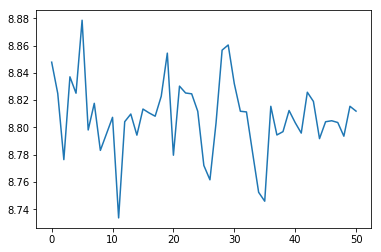

In [23]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(loss_list))),loss_list)
plt.show()

In [ ]:
test=[1,4,4]
roots=layer_6.eval({X:np.array([test])})    
print(roots)
print(np.roots(test))

In [ ]:
def evaluate(roots_list,coeff_list):
    comp_root=[]
    for i in range(0,len(roots_list),2):
            comp_root.append(roots_list[i]+1j*roots_list[i+1])
    print(comp_root)
    ans=0
    for i in range(len(coeff_list)):
        ans+=coeff_list[i]*np.array(comp_root)**(len(coeff_list)-i)
    return ans    
    
       
evaluate(*roots,test)    